## CODE INFORMATION:

This is code that given a train number and a station will create a histogram of that train's arrival delays at the given station between July 2021 and June 2022.

# Important Inputs:

In [1]:
# One of these 2 must exist, other can be ""
# Number can be entered as "30*", "2100-2200", "3,4,5,6" or "all"
number = "5"
station = "EMY"

# Create the Histogram:

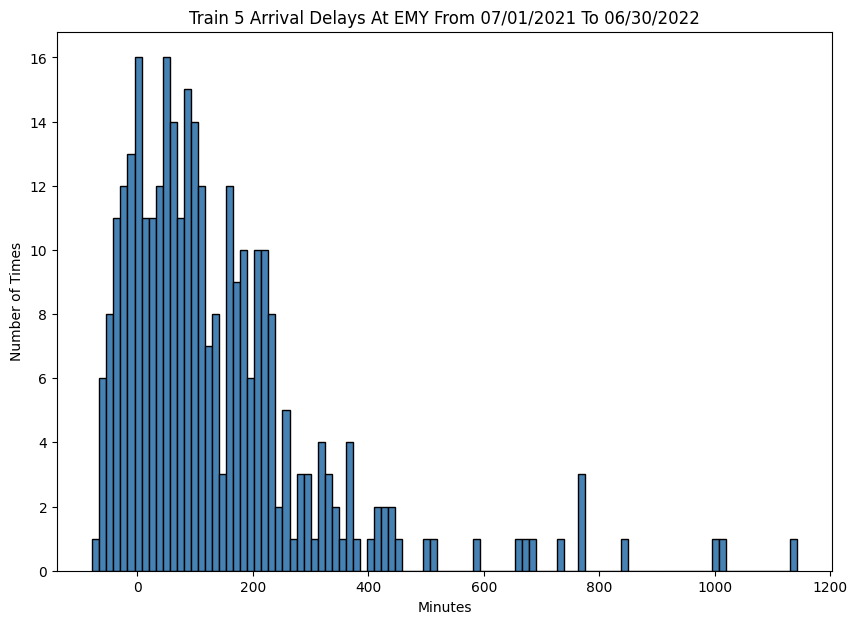

Mean 138.80817610062894
Median 94.0
Variance 32402.639304220553


In [2]:
# Make a histogram of a train's arrival delay times at a given station over a given time frame
import requests
from matplotlib import pyplot as plt
import numpy as np

# Must all exist
start_month = "07"
start_day = "01"
start_year = "2021"

# Don't have to exist if only looking at one day
# If only looking at one day, can be ""
end_month = "06"
end_day = "30"
end_year = "2022"

# All these must exist
sunday = "1"
monday = "1"
tuesday = "1"
wednesday = "1"
thursday = "1"
friday = "1"
saturday = "1"

# Must exist
# Should be "d_dp" or "d_ar"
delay_type = "d_ar"

# Must exist
# "DESC" or "ASC"
order = "DESC"

# Must exist
# "gt", "gteq", "eq", "lteq", "lt"
sign = "gt"

# Optional, can be ""
minutes = ""

# Keep at 1
# Setting to zero ignores weekday inputs
# Set to zero if you always want every day of the week
dfon = "1"

URL = "https://juckins.net/amtrak_status/archive/html/history.php?"
URL = URL + "train_num=" + number
URL = URL + "&station=" + station
URL = URL + "&date_start=" + start_month + "%2F" + start_day + "%2F" + start_year
URL = URL + "&date_end=" + end_month + "%2F" + end_day + "%2F" + end_year
URL = URL + "&df1=" + sunday + "&df2=" + monday + "&df3=" + tuesday + "&df4=" + wednesday + "&df5=" + thursday + "&df6=" + friday + "&df7=" + saturday
URL = URL + "&sort=" + delay_type + "&sort_dir=" + order
URL = URL + "&co=" + sign + "&limit_mins=" + minutes + "&dfon=" + dfon
page = requests.get(URL)

listDelays = []
toFind = "</span></td><td style=\"text-align: center;\">"
length = len(toFind)
searching = page.text.find(toFind)
while (searching != -1) :
    end = page.text.find("<", searching + length)
    delayNumber = int(page.text[searching+length:end])
    listDelays.append(delayNumber)
    searching = page.text.find(toFind, end)

delays = np.asarray(listDelays)

# Creating histogram
wanted_bins = 100

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(delays, bins = wanted_bins, ec='black', color = "steelblue")
plt.xlabel('Minutes') 
plt.ylabel('Number of Times') 
graphTitle = "Train " + number + " Arrival Delays At " + station + \
    " From " + start_month + "/" + start_day + "/" + start_year + \
    " To " + end_month + "/" + end_day + "/" + end_year
plt.title(graphTitle)
plt.show()

# Report some data
print("Mean", np.mean(delays))
print("Median", np.median(delays))
print("Variance", np.var(delays))